In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mtplot
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from yellowbrick.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer
import warnings
from sklearn.exceptions import ConvergenceWarning
#load dataset
dataset_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width','class']
df = pd.read_csv(dataset_link, names=column_names)

df = df.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
df.head()

X=df.iloc[:,:-1]
y=df.iloc[:,4]
#divide to train and test split
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)
#define soc formula for DT
def get_soc_dt(D,f):
    return (2*D+1)+(2*f)

min SOC:  11  corresponding accuracy:  0.6666666666666666


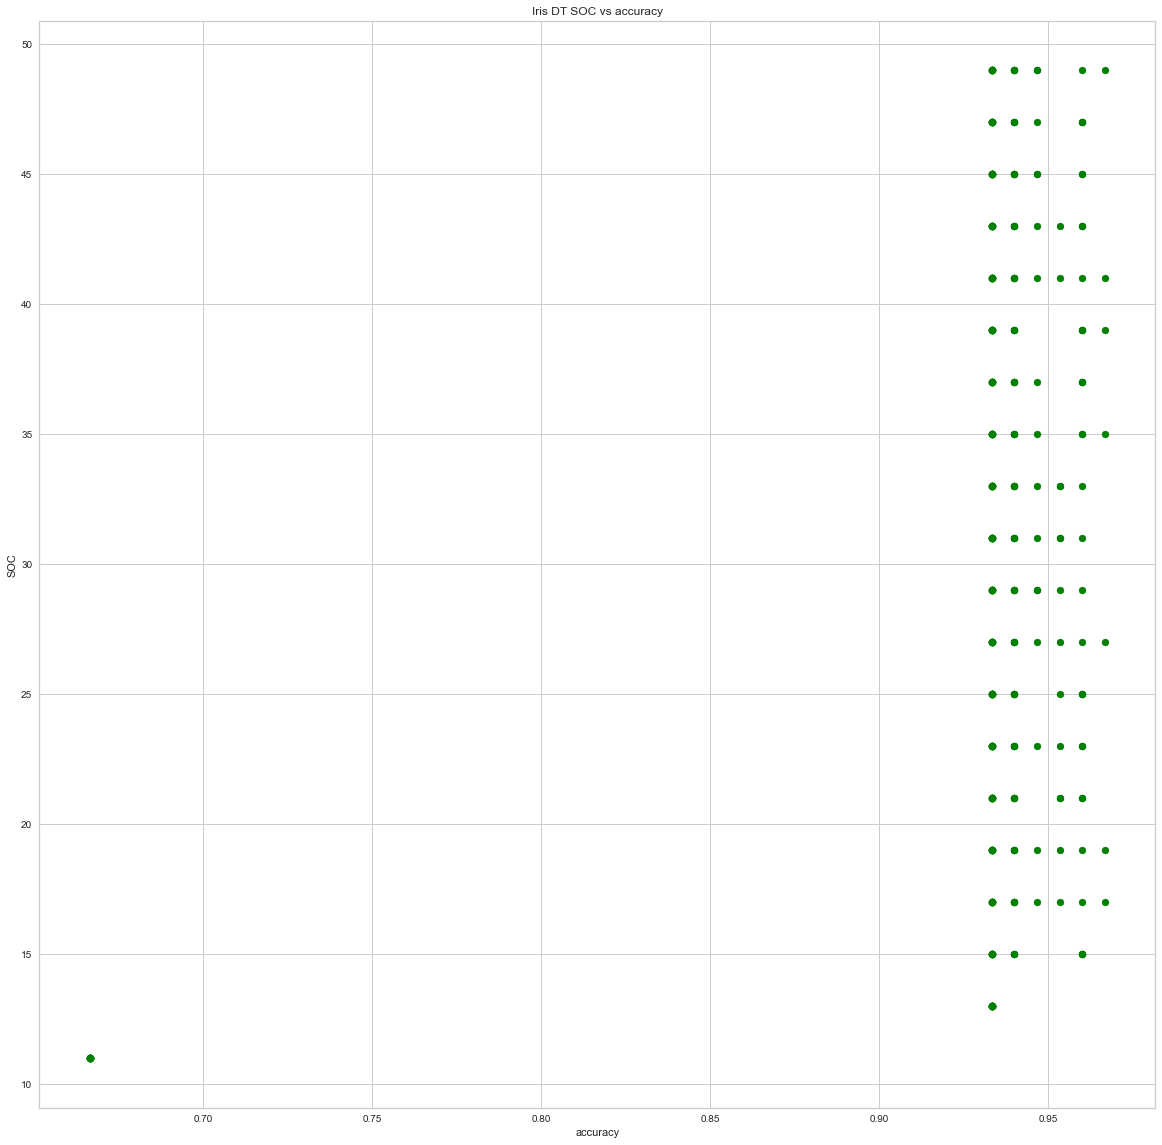

In [2]:

md=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
msl=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
list_C=[]
list_gamma=[]
min_soc = 1000000
min_gamma=100000
min_c = 100000
socs = np.array([])
accuracies=np.array([])
colors=np.array([])
colors=np.append(colors,'green')
minAccuracy=0.001
rows_list = []
for maximum_depth in md:
    for minimim_samples_leaf in msl:
        model = DecisionTreeClassifier(max_depth=maximum_depth,min_samples_leaf=minimim_samples_leaf)
        model.fit(X,y)
        soc = get_soc_dt(model.max_depth,X.shape[1])
        socs = np.append(socs,soc)
        accuracy = cross_val_score(model,X,y,cv=5,scoring='accuracy')
        accuracy=np.abs(np.mean(accuracy))
        if min_soc>soc:
            min_soc = soc
            max_acc = accuracy
            min_soc_msl= minimim_samples_leaf
            min_soc_md = maximum_depth
        accuracies = np.append(accuracies,accuracy)
        dics_val = {'SOC':soc, 'param_maximum_depth': maximum_depth, 'param_minimim_samples_leaf':minimim_samples_leaf}
        rows_list.append(dics_val)

plt.figure(figsize=(20,20))
plt.title('Iris DT SOC vs accuracy')
plt.scatter(accuracies,socs,c=colors)
plt.xlabel('accuracy')
plt.ylabel('SOC')
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 22})
plt.show()


In [3]:
filtered_socs_with_accuracy = [[],[]] #[[socs],[accuracies]]
index_filtered=0
for i in range(len(socs)):
    if(socs[i] not in filtered_socs_with_accuracy[0]):
        filtered_socs_with_accuracy[0].append(socs[i])
        filtered_socs_with_accuracy[1].append(accuracies[i])
        index_filtered+=1
    else:
        for j in range(len(filtered_socs_with_accuracy[0])):
            if socs[i] == filtered_socs_with_accuracy[0][j]:
                if(accuracies[i] > filtered_socs_with_accuracy[1][j]):
                    filtered_socs_with_accuracy[1][j]=accuracies[i]
                    break
for j in range(len(filtered_socs_with_accuracy[0])):
        print(filtered_socs_with_accuracy[0][j],' : ',filtered_socs_with_accuracy[1][j])

11.0  :  0.6666666666666666
13.0  :  0.9333333333333332
15.0  :  0.96
17.0  :  0.9666666666666668
19.0  :  0.9666666666666668
21.0  :  0.96
23.0  :  0.9600000000000002
25.0  :  0.9600000000000002
27.0  :  0.9666666666666668
29.0  :  0.9600000000000002
31.0  :  0.96
33.0  :  0.96
35.0  :  0.9666666666666668
37.0  :  0.9600000000000002
39.0  :  0.9666666666666668
41.0  :  0.9666666666666668
43.0  :  0.96
45.0  :  0.9600000000000002
47.0  :  0.9600000000000002
49.0  :  0.9666666666666668
